# Contents

- Assumptions
- Steps
- Tabular results
- Visualization
- Raw implementation

# Assumptions

1. **MRR** = (Number of customers in the plan * Monthly fee for the plan)

2. **saleDate** is a date our addon starts generating revenue

3. **vendorAmount** is our revenue

# Steps

**Steps:**

1. Read data to Pandas DataFrame
2. Check what subscription plans (billing periods) and products we have 
3. Check what sales types we have and how they're written in database

We have two addon names, though one of them is Free version and contains only 1 trial and refund, we may ignore it.

We have two billing periods: Monthly and Annual. SInce we'll calculate MRR on a monthly basis Annual data should be transformed into Monthly amount.

We have 4 saleType: New, Refund, Renewal, Upgrade.

**Next steps:**

4. Convert saleDate to appropriate format, i.e. getting rid of day property
5. Calculating Monthly billing MMR alone
6. Converting Annual MMR to Monthly MMR by distributing vendorAmount over 12 month period
7. Summing up 2 numbers above to get full MMR
8. Building single table with saleDate, MMR and Sales (additionally I've added MMR by Monthly and Annual plans respectively to see what the overall MRR built from)

# Tabular Results

The table below shows MMR and Sales by month.

- **saleDate** is a year and month we calculate our MMR and sum up Sales
- **Monthly** shows Monthly plan contribulion to overall MMR
- **Annual** shows Annual plan contribulion to overall MMR
- **MRR** is the overall MMR
- **sales** is total sales

In [536]:
mmr_final

,saleDate,Monthly,Annual,MMR,sales
0,2017-02,22.50,NaN,NaN,22.50
1,2017-03,82.50,10.187500,92.687500,204.75
2,2017-04,138.75,22.187500,160.937500,282.75
3,2017-05,228.75,24.530833,253.280833,256.87
4,2017-06,262.50,24.530833,287.030833,262.50
5,2017-07,341.25,112.530833,453.780833,1397.25
6,2017-08,242.03,114.155833,356.185833,261.53
7,2017-09,309.37,226.468333,535.838333,1657.12
8,2017-10,431.03,235.718333,666.748333,542.03
9,2017-11,735.74,349.354167,1085.094167,2099.37


# Visualization

This chart shows relationship between total sales and MRR over time

We can see clear spikes of sales in the end of summer, in autumn and in the beginning of year. The two latter I would probably attribute to the beginning of the financial and calendar years respectively. As to end of summer, this may be attributed to end of fiscal year. However, these are just assumptions, as we need to have more info on marketing and sales activities as well as to the nature of this addon.

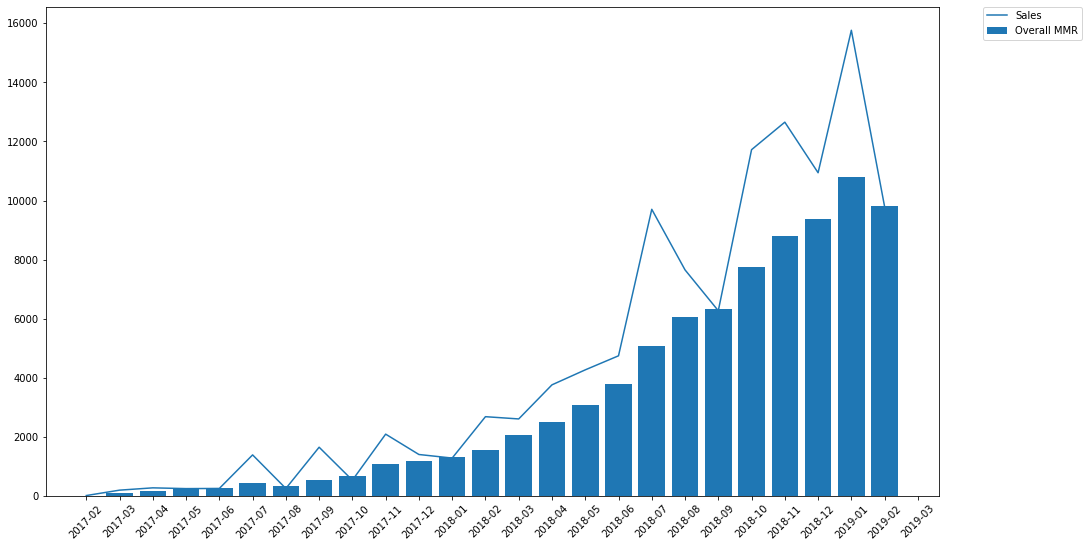

In [540]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
plt.bar(mmr_final['saleDate'], mmr_final['MMR'], label = 'Overall MMR')
plt.plot(mmr_final['saleDate'], mmr_final['sales'], label = 'Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The histogram chart below shows how Monthly annual plan MRR compares to normalized Annual plan MRR.

We see that despite Monthly MRR is way bigger, Annual billing allows us to secure steady and quite predicted revenue. So balancing between these plans could be beneficial for the company.

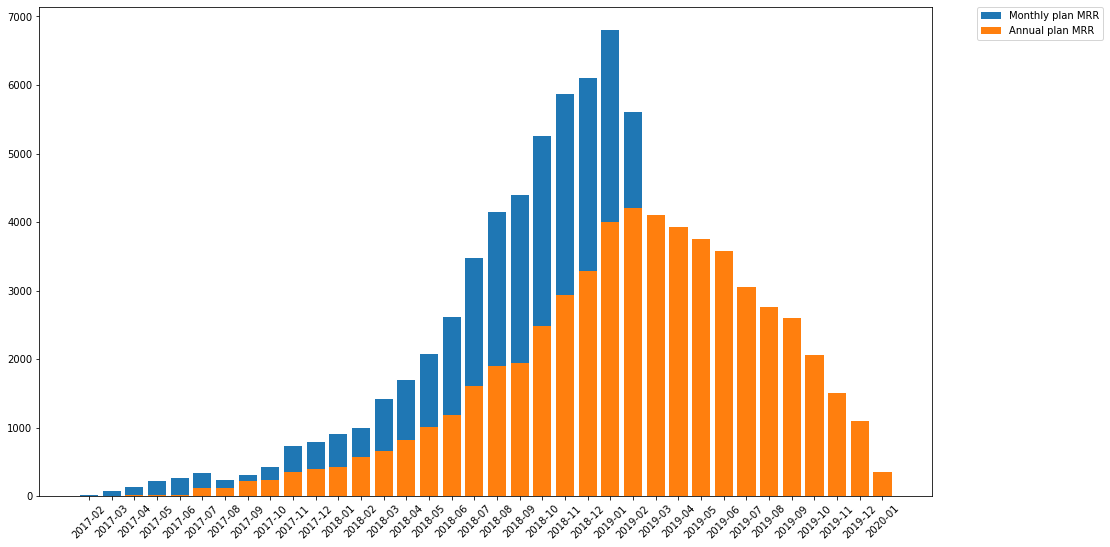

In [544]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
plt.bar(mmr_final['saleDate'], mmr_final['Monthly'], label='Monthly plan MRR')
plt.bar(mmr_final['saleDate'], mmr_final['Annual'], label='Annual plan MRR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Raw Implementation

In [373]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [374]:
ds_sales_data = pd.read_excel('MRR Task.xlsx',\
                              sheet_name='ds sales data', parse_dates=["saleDate", "maintenanceStartDate", "maintenanceEndDate"])


In [375]:
ds_license_data = pd.read_excel('MRR Task.xlsx',\
                              sheet_name='ds license data', parse_dates=["maintenanceStartDate", "maintenanceEndDate"])


In [376]:
merged = ds_sales_data.merge(ds_license_data, on='addonLicenseId', how='left')


In [377]:
pd.set_option("display.max.columns", None)

In [539]:
merged.describe()

,addonLicenseId,hostLicenseId_x,purchasePrice,vendorAmount,hostLicenseId_y
count,4.012000e+03,3.597000e+03,4012.000000,4012.000000,3.593000e+03
mean,1.124832e+07,7.973225e+06,37.318106,27.987014,7.972423e+06
std,1.018745e+06,2.924985e+06,95.226656,71.420128,2.926449e+06
min,8.840869e+06,2.131206e+06,-770.000000,-577.500000,2.131206e+06
25%,1.060154e+07,5.935575e+06,5.000000,3.750000,5.935575e+06
50%,1.150000e+07,8.529744e+06,12.000000,9.000000,8.529744e+06
75%,1.199311e+07,1.033856e+07,30.500000,22.870000,1.033856e+07
max,1.323554e+07,1.282244e+07,1400.000000,1050.000000,1.282244e+07


In [381]:
merged['billingPeriod'].value_counts()

Monthly    3528
Annual      484
Name: billingPeriod, dtype: int64

In [383]:
merged['saleType'].value_counts()

Renewal    1902
Upgrade    1164
New         921
Refund       25
Name: saleType, dtype: int64

We have two billing periods: Monthly and Annual. SInce we'll calculate MRR on a monthly basis Annual data should be transformed into Monthly amount.

We have 4 saleType: New, Refund, Renewal, Upgrade. 

In [384]:
merged['saleDate'] = merged['saleDate'].apply(lambda x: x.strftime("%Y-%m"))

Given the fact that each row from the data source consists of billing information and for Monthly plan customers billed on a monthly basis, grouping them together and summing up their monthly bills will return us the total monthly revenue. We may ignore refunds, because they have a minus sign and deducted authomatically.

As to Annual plans, we may divide them from Monthly plans or sum up their billing amount to a respective month.

# Result for Monthly & Annual Plans Respectively

In [385]:
merged.groupby(["saleDate", "billingPeriod"])["vendorAmount"].sum()

saleDate  billingPeriod
2017-02   Monthly            22.50
2017-03   Annual            122.25
          Monthly            82.50
2017-04   Annual            144.00
          Monthly           138.75
2017-05   Annual             28.12
          Monthly           228.75
2017-06   Monthly           262.50
2017-07   Annual           1056.00
          Monthly           341.25
2017-08   Annual             19.50
          Monthly           242.03
2017-09   Annual           1347.75
          Monthly           309.37
2017-10   Annual            111.00
          Monthly           431.03
2017-11   Annual           1363.63
          Monthly           735.74
2017-12   Annual            624.00
          Monthly           786.75
2018-01   Annual            382.50
          Monthly           907.46
2018-02   Annual           1698.00
          Monthly           991.98
2018-03   Annual           1191.00
          Monthly          1422.71
2018-04   Annual           2072.99
          Monthly          1694

# Result for All Plans (Total Monthly Sales)

In [386]:
total_monthly_sales = merged.groupby(["saleDate"])["vendorAmount"].sum()
total_monthly_sales.to_frame()

,vendorAmount
saleDate,
2017-02,22.50
2017-03,204.75
2017-04,282.75
2017-05,256.87
2017-06,262.50
2017-07,1397.25
2017-08,261.53
2017-09,1657.12
2017-10,542.03


# MRR without Annual Plans

In [387]:
merged[(merged["billingPeriod"] == "Monthly")].groupby(["saleDate"])["vendorAmount"].sum().to_frame()

,vendorAmount
saleDate,
2017-02,22.50
2017-03,82.50
2017-04,138.75
2017-05,228.75
2017-06,262.50
2017-07,341.25
2017-08,242.03
2017-09,309.37
2017-10,431.03


In [388]:
mrr_wo_annual = merged[(merged["billingPeriod"] == "Monthly")].groupby(["saleDate"])["vendorAmount"].sum()

In [406]:
mrr_wo_annual = mrr_wo_annual.to_frame()

In [407]:
mrr_wo_annual

,vendorAmount
saleDate,
2017-02,22.50
2017-03,82.50
2017-04,138.75
2017-05,228.75
2017-06,262.50
2017-07,341.25
2017-08,242.03
2017-09,309.37
2017-10,431.03


# Annual Plans

In [390]:
annual_rev = merged[(merged["billingPeriod"] == "Annual")].groupby(["saleDate"])["vendorAmount"].sum()

In [391]:
annual_rev = annual_rev.to_frame()

In [413]:
annual_rev

,vendorAmount
saleDate,
2017-03,122.25
2017-04,144.00
2017-05,28.12
2017-07,1056.00
2017-08,19.50
2017-09,1347.75
2017-10,111.00
2017-11,1363.63
2017-12,624.00


# Distributing annual bill over 12 months

In [397]:
dfs = []
for date, values in annual_rev.iterrows():
    saleDate, vendorAmount = date, values
    dfs.append(
        pd.DataFrame(
            # Compute the price for each month, and repeat this value
            data={'vendorAmount': [vendorAmount / 12] * 1},
            # The index is a date range for the requested number of months
            index=pd.date_range(start=saleDate, periods=12, freq='M')
        )
    )

In [411]:
annual_12 = pd.concat(dfs).resample('M').sum()

In [429]:
annual_12 = annual_12.reset_index().rename(columns={'index':'saleDate'})

In [430]:
annual_12['saleDate'] = annual_12['saleDate'].apply(lambda x: x.strftime("%Y-%m"))

In [431]:
annual_12

,saleDate,vendorAmount
0,2017-03,10.187500
1,2017-04,22.187500
2,2017-05,24.530833
3,2017-06,24.530833
4,2017-07,112.530833
5,2017-08,114.155833
6,2017-09,226.468333
7,2017-10,235.718333
8,2017-11,349.354167
9,2017-12,401.354167


In [526]:
mmr_final = mrr_wo_annual.merge(annual_12, on='saleDate', how='outer')

In [527]:
mmr_final['MMR'] = mmr_final['vendorAmount_x'] + mmr_final['vendorAmount_y']

In [528]:
mmr_final = mmr_final.merge(total_monthly_sales.to_frame(), on='saleDate', how='left')

In [529]:
mmr_final['sales'] = mmr_final['vendorAmount']

In [530]:
mmr_final = mmr_final.drop(columns=['vendorAmount'])

In [531]:
mmr_final = mmr_final.rename(columns={'vendorAmount_x': 'Monthly', 'vendorAmount_y': 'Annual'})

In [532]:
mmr_final

,saleDate,Monthly,Annual,MMR,sales
0,2017-02,22.50,NaN,NaN,22.50
1,2017-03,82.50,10.187500,92.687500,204.75
2,2017-04,138.75,22.187500,160.937500,282.75
3,2017-05,228.75,24.530833,253.280833,256.87
4,2017-06,262.50,24.530833,287.030833,262.50
5,2017-07,341.25,112.530833,453.780833,1397.25
6,2017-08,242.03,114.155833,356.185833,261.53
7,2017-09,309.37,226.468333,535.838333,1657.12
8,2017-10,431.03,235.718333,666.748333,542.03
9,2017-11,735.74,349.354167,1085.094167,2099.37


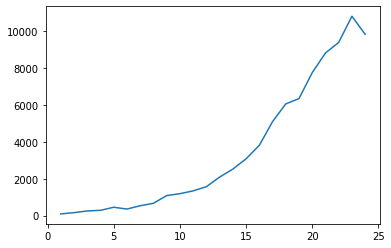

In [533]:
mmr_final['MMR'].plot(kind='line')

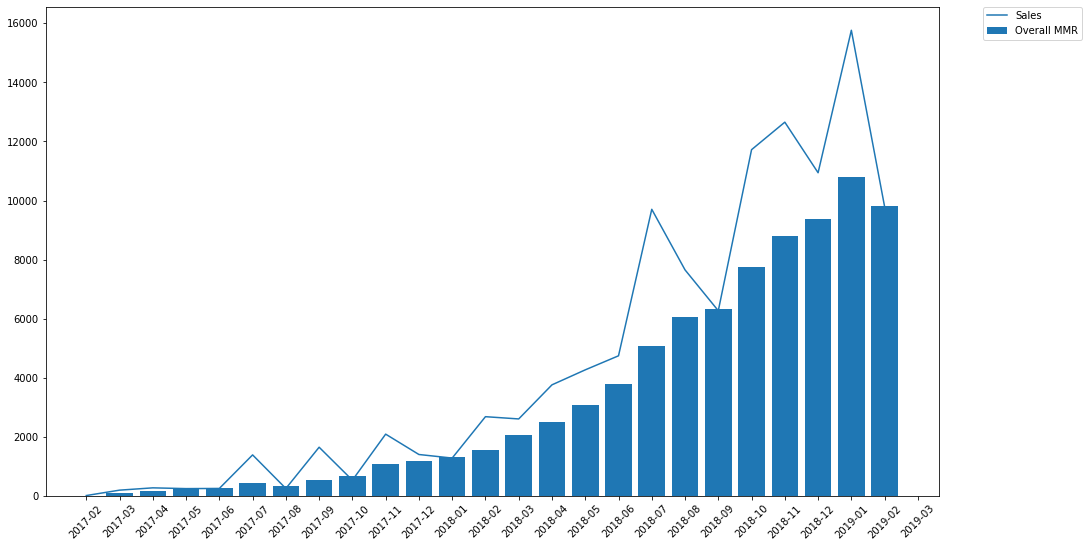

In [541]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
plt.bar(mmr_final['saleDate'], mmr_final['MMR'], label = 'Overall MMR')
plt.plot(mmr_final['saleDate'], mmr_final['sales'], label = 'Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

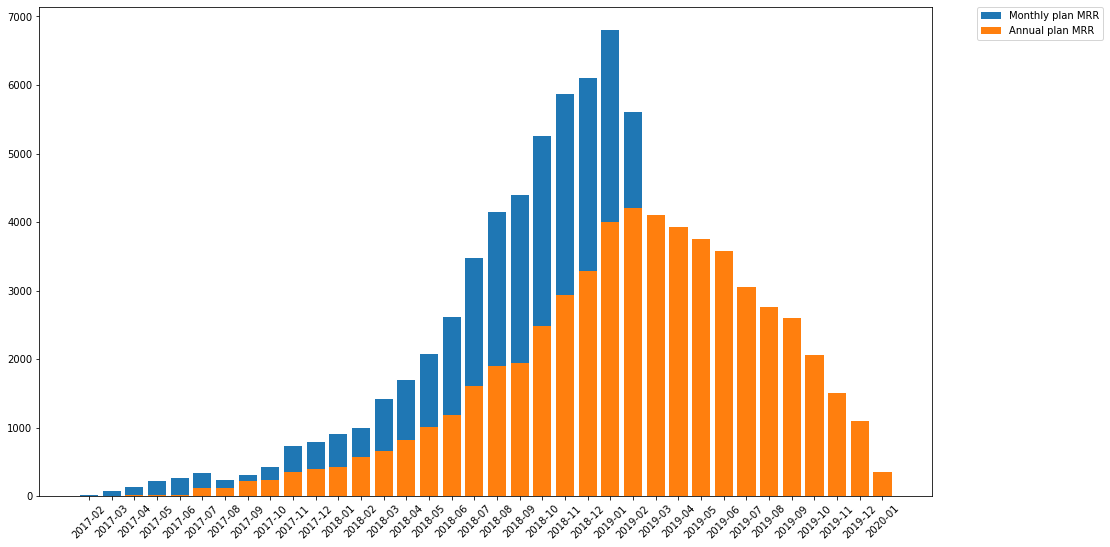

In [543]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
plt.bar(mmr_final['saleDate'], mmr_final['Monthly'], label='Monthly plan MRR')
plt.bar(mmr_final['saleDate'], mmr_final['Annual'], label='Annual plan MRR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)